In [2]:
from datetime import datetime

import pandas as pd
from prophet import Prophet

In [3]:
data = pd.read_csv("data/Waste_Collection___Diversion_Report__daily_.csv")
data['Report Date'] = data['Report Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
data['Load Time'] = data['Load Time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
data['Load Weight'] = data['Load Weight'].apply(lambda x: float(str(x).replace(',', '')))

In [11]:
data.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
0,2020-12-08,BULK,2020-12-08 15:02:00,5220.0,TDS LANDFILL,BULK,BU13,899097
1,2020-12-08,RECYCLING - SINGLE STREAM,2020-12-08 10:00:00,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078
2,2020-12-03,RECYCLING - SINGLE STREAM,2020-12-03 10:34:00,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,899082
3,2020-12-07,SWEEPING,2020-12-07 10:15:00,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,DSS04,899030
4,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 16:00:00,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,899048


In [5]:
data[["Report Date", "Load Weight", "Load Type", "Route Number"]].head()

,Report Date,Load Weight,Load Type,Route Number
0,2020-12-08,5220.0,BULK,BU13
1,2020-12-08,11140.0,RECYCLING - SINGLE STREAM,RTAU53
2,2020-12-03,10060.0,RECYCLING - SINGLE STREAM,RHBU10
3,2020-12-07,7100.0,SWEEPING,DSS04
4,2020-12-07,12000.0,RECYCLING - SINGLE STREAM,RMAU53


In [8]:
data['Route Number'].value_counts()

SDT01      11279
DSS04       6870
DA01        4323
BU13        2667
DA02        2633
           ...  
RWNON38        1
SSN18          1
PAS87          1
TNONMC         1
HNONEG         1
Name: Route Number, Length: 2221, dtype: int64

In [10]:
data[data["Route Number"] == "BU13"][["Report Date", "Load Weight", "Load Type", "Route Number"]].head()

,Report Date,Load Weight,Load Type,Route Number
0,2020-12-08,5220.0,BULK,BU13
6,2020-12-08,7700.0,BULK,BU13
7,2020-12-08,6520.0,BULK,BU13
11,2020-12-08,9260.0,BULK,BU13
57,2020-12-08,10100.0,BULK,BU13


In [29]:
# data.groupby('Report Date')['Load Weight'].sum().plot()
df = data.groupby('Report Date')['Load Weight'].sum().reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2003-01-13,20170.0
1,2004-08-25,139140.0
2,2004-08-26,61480.0
3,2004-08-30,13160.0
4,2004-09-28,120740.0


In [30]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -475.783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11907.4    0.00409109       176.997           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11911.8   0.000544095       140.862     0.02885           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       11912.2   0.000241669       190.044   1.799e-06       0.001      297  LS failed, Hessian reset 
     280       11912.4   5.10655e-05       96.0717   5.225e-07       0.001      433  LS failed, Hessian reset 
     299       11912.4   1.54643e-06       59.5242       0.417       0.417      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       11912.4   4.32506e-06       64.3088   6.782e-08       0.001      514  LS failed, Hessian rese

,ds
5951,2022-07-05
5952,2022-07-06
5953,2022-07-07
5954,2022-07-08
5955,2022-07-09


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
5951,2022-07-05,1.962775e+06,1.618563e+06,2.325076e+06
5952,2022-07-06,2.135789e+06,1.789650e+06,2.479319e+06
5953,2022-07-07,2.001937e+06,1.643785e+06,2.366069e+06
5954,2022-07-08,1.814079e+06,1.468349e+06,2.155930e+06
5955,2022-07-09,3.927808e+05,1.468836e+04,7.355827e+05


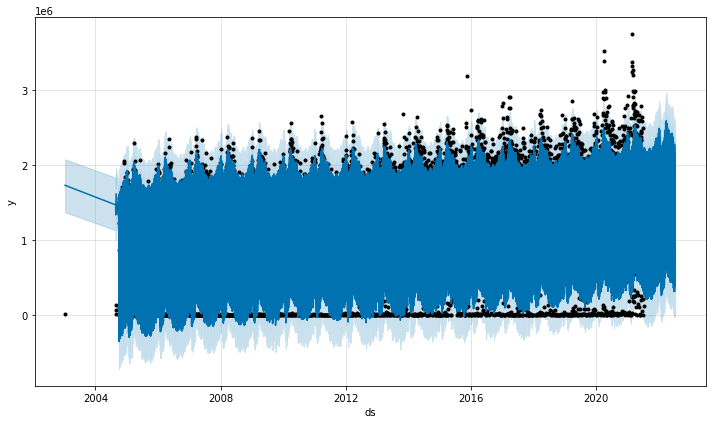

In [32]:
fig1 = m.plot(forecast)

/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/darenasc/.local/share/virtualenvs/data_world_league_2022-o40nAfHA/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


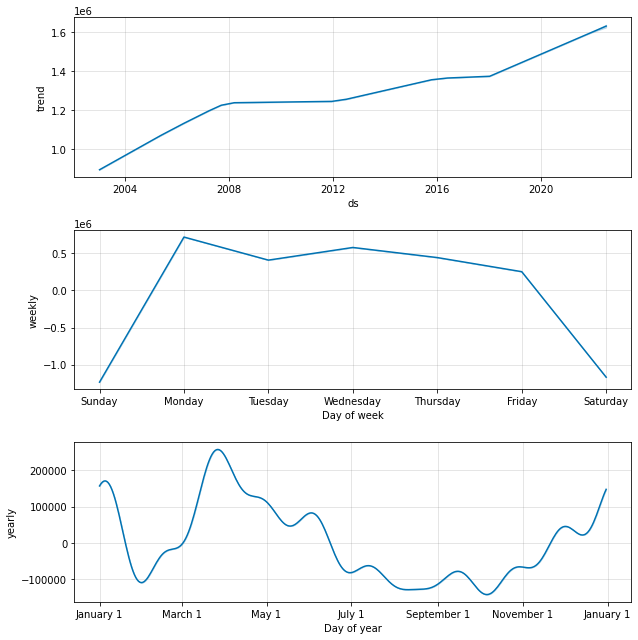

In [33]:
fig2 = m.plot_components(forecast)

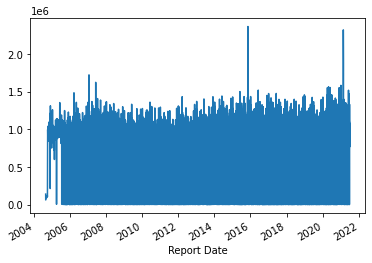

In [25]:
data[data['Load Type'] == "GARBAGE COLLECTIONS"].groupby('Report Date')['Load Weight'].sum().plot();

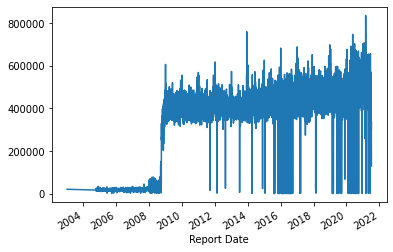

In [26]:
data[data['Load Type'] == "RECYCLING - SINGLE STREAM"].groupby('Report Date')['Load Weight'].sum().plot();

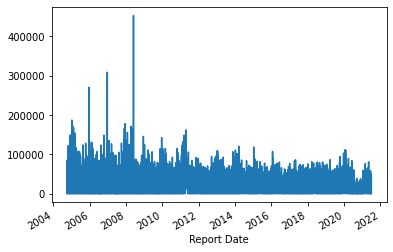

In [27]:
data[data['Load Type'] == "SWEEPING"].groupby('Report Date')['Load Weight'].sum().plot();

In [ ]:
data.groupby('Report Date')['Load Weight'].sum().plot()